In [1]:
import pandas as pd
import numpy as np
from functools import lru_cache
from numba import njit, prange
import itertools
from scipy import stats
#import owlready2
from collections import Counter
import anndata as ad

## getting all possible types of values

In [3]:
#ls ../../../data

cellxgene/  data.lndb


In [2]:
# !lamin login jkobject
# !lamin init --storage ../../../data2 --schema bionty
# !lamin load laminlabs/cellxgene-census

‚úÖ saved: User(uid='a3keNAVX', handle='jkobject', updated_at=2023-11-17 09:29:12 UTC)
‚úÖ saved: Storage(uid='sFdlllj3', root='/home/ml4ig1/Documents code/data2', type='local', updated_at=2023-11-17 09:29:12 UTC, created_by_id=1)
üí° loaded instance: jkobject/data2
üí° did not register local instance on hub


In [2]:
import lamindb as ln
import lnschema_bionty as lb

üí° lamindb instance: jkobject/scprint


In [2]:
lb.settings.organism = "human"
#ln.settings.verbosity = "hint"

In [5]:
# ln.track()

üí° Attaching notebook metadata


üí° notebook imports: anndata==0.10.3 cellxgene-census==1.7.0 decoupler lamindb==0.61.0 lnschema_bionty==0.35.0 numba==0.56.4 numpy==1.23.5 omnipath pandas==2.1.3 scipy==1.11.3 tiledbsoma==1.4.4


UpdateNbWithNonInteractiveEditorError: 
(1) save your notebook!
(2) attach metadata to the notebook by running the CLI:
lamin track /home/ml4ig1/Documents code/scPRINT/notebooks/assessments/work_on_dataloader_onto part 2.ipynb
(3) reload or re-open your notebook

In [121]:
bt.display_available_sources()

source                  organism        version  \
entity                                                                    
Organism               ensembl               vertebrates    release-110   
Organism               ensembl               vertebrates    release-109   
Organism               ensembl               vertebrates    release-108   
Organism               ensembl                  bacteria     release-57   
Organism               ensembl                     fungi     release-57   
Organism               ensembl                   metazoa     release-57   
Organism               ensembl                    plants     release-57   
Organism             ncbitaxon                       all     2023-06-20   
Gene                   ensembl                     human    release-110   
Gene                   ensembl                     human    release-109   
Gene                   ensembl                     mouse    release-110   
Gene                   ensembl                     mouse    release-109   
Gene                   ensembl  saccharomyces cerevisiae    release-110   
Protein                uniprot                     human        2023-03   
Protein                uniprot                     human        2023-02   
Protein                uniprot                     mouse        2023-03   
Protein                uniprot                     mouse        2023-02   
CellMarker          cellmarker                     human            2.0   
CellMarker          cellmarker                     mouse            2.0   
CellLine                   clo                       all     2022-03-21   
CellType                    cl                       all     2023-04-20   
CellType                    cl                       all     2023-02-15   
CellType                    cl                       all     2022-08-16   
Tissue                  uberon                       all     2023-04-19   
Tissue                  uberon                       all     2023-02-14   
Tissue                  uberon                       all     2022-08-19   
Disease                  mondo                       all     2023-04-04   
Disease                  mondo                       all     2023-02-06   
Disease                  mondo                       all     2022-10-11   
Disease                   doid                     human     2023-03-31   
Disease                   doid                     human     2023-01-30   
ExperimentalFactor         efo                       all         3.48.0   
Phenotype                   hp                     human     2023-06-17   
Phenotype                   hp                     human     2023-04-05   
Phenotype                   hp                     human     2023-01-27   
Phenotype                   mp                 mammalian     2023-05-31   
Phenotype                   zp                 zebrafish     2022-12-17   
Phenotype                  phe                     human            1.2   
Phenotype                 pato                       all     2023-05-18   
Pathway                     go                       all     2023-05-10   
Pathway                     pw                       all           7.79   
BFXPipeline              lamin                       all          1.0.0   
Drug                      dron                       all     2023-03-10   
DevelopmentalStage      hsapdv                     human     2020-03-10   
DevelopmentalStage      mmusdv                     mouse     2020-03-10   
Ethnicity            hancestro                     human  2023-07-313.0   
BioSample                 ncbi                       all        2023-09   

                                                                  url  \
entity                                                                  
Organism            https://ftp.ensembl.org/pub/release-110/specie...   
Organism            https://ftp.ensembl.org/pub/release-109/specie...   
Organism            https://ftp.ensembl.org/pub/release-

In [45]:
# Celltype
names = bt.CellType().df().index
records = lb.CellType.from_values(names, field=lb.CellType.ontology_id)
ln.save(records)
lb.CellType(name="unknown", ontology_id="unknown").save()
# Organism
# names = bt.Organism().df().index
names = ['NCBITaxon:10090', 'NCBITaxon:9606']
records = lb.Organism.from_values(names, field=lb.Organism.ontology_id)
ln.save(records)
lb.Organism(name="unknown", ontology_id="unknown").save()
# Phenotype
#name = bt.Phenotype().df().index
name = df['sex_ontology_term_id'].unique()
records = lb.Phenotype.from_values(name, field=lb.Phenotype.ontology_id)
ln.save(records)
lb.Phenotype(name="unknown", ontology_id="unknown").save()
# ethnicity
names = bt.Ethnicity().df().index
records = lb.Ethnicity.from_values(names, field=lb.Ethnicity.ontology_id)
ln.save(records)
lb.Ethnicity(name="unknown", ontology_id="unknown").save() #multi ethnic will have to get renamed
# ExperimentalFactor
names = df2['assay_ontology_term_id'].unique()
records = lb.ExperimentalFactor.from_values(names, field=lb.ExperimentalFactor.ontology_id)
ln.save(records)
lb.ExperimentalFactor(name="SMART-Seq v4", ontology_id="EFO:0700016").save()
lb.ExperimentalFactor(name="unknown", ontology_id="unknown").save()
lookup = lb.ExperimentalFactor.lookup()
lookup.smart_seq_v4.parents.add(lookup.smart_like)
# Tissue
#names = bt.Tissue().df().index
names= df['tissue_ontology_term_id'].unique()
records = lb.Tissue.from_values(names, field=lb.Tissue.ontology_id)
ln.save(records)
lb.Tissue(name="unknown", ontology_id="unknown").save()
# DevelopmentalStage
bionty_df = bt.DevelopmentalStage().df()
records = lb.DevelopmentalStage.from_values(bionty_df.index, field=lb.DevelopmentalStage.ontology_id, organism="mouse")
ln.save(records)
lb.DevelopmentalStage(name="unknown", ontology_id="unknown").save()
# Disease
# values = bt.Disease().df().index
values = df['disease_ontology_term_id'].unique()
records = lb.Disease.from_values(values, field=lb.Disease.ontology_id)
ln.save(records)
lb.Disease(name="normal", ontology_id="PATO:0000461").save()
lb.Disease(name="unknown", ontology_id="unknown").save()
# genes
bionty_df = bt.Gene().df()
records = lb.Gene.from_values(bionty_df.index, field=lb.Gene.ontology_id)
ln.save(records)

‚úÖ loaded 37 CellType records matching ontology_id: 'CL:0000057', 'CL:0000071', 'CL:0000077', 'CL:0000158', 'CL:0000186', 'CL:0000192', 'CL:0000235', 'CL:0000236', 'CL:0000359', 'CL:0000451', 'CL:0000624', 'CL:0000625', 'CL:0000646', 'CL:0000669', 'CL:0000767', 'CL:0000775', 'CL:0000784', 'CL:0000786', 'CL:0000814', 'CL:0000860', ...
‚úÖ created 2825 CellType records from Bionty matching ontology_id: 'CL:0000000', 'CL:0000001', 'CL:0000002', 'CL:0000003', 'CL:0000004', 'CL:0000005', 'CL:0000006', 'CL:0000007', 'CL:0000008', 'CL:0000009', 'CL:0000010', 'CL:0000011', 'CL:0000012', 'CL:0000013', 'CL:0000014', 'CL:0000015', 'CL:0000016', 'CL:0000017', 'CL:0000018', 'CL:0000019', ...
‚úÖ created 2825 CellType records from Bionty matching ontology_id: 'CL:0000000', 'CL:0000001', 'CL:0000002', 'CL:0000003', 'CL:0000004', 'CL:0000005', 'CL:0000006', 'CL:0000007', 'CL:0000008', 'CL:0000009', 'CL:0000010', 'CL:0000011', 'CL:0000012', 'CL:0000013', 'CL:0000014', 'CL:0000015', 'CL:0000016', 'CL:0

In [164]:
lb.DevelopmentalStage.ontology_id

FieldAttr(DevelopmentalStage.ontology_id)

In [299]:
tissdf = lb.Tissue.filter().df(include=["parents__name"])

In [190]:
disdf = lb.Disease.filter().df(include=["parents__name"])

In [ ]:
bt.DevelopmentalStage(organism="mouse")

In [163]:
lb.DevelopmentalStage(organism="mouse").df()

TypeError: DevelopmentalStage() got unexpected keyword arguments: 'organism'

In [177]:
names = df2['cell_type_ontology_term_id'].unique()
records = lb.CellType.from_values(names, field=lb.CellType.ontology_id)
ln.save(records)

In [185]:
'CL:0000648' in set(names)

False

In [182]:
lb.CellType.df().set_index('ontology_id').loc['CL:0000648']

KeyError: 'CL:0000648'

In [155]:
# DevelopmentalStage
names = df2['development_stage_ontology_term_id'].unique()
records = lb.DevelopmentalStage.from_values(names, field=lb.DevelopmentalStage.ontology_id, , organism="mouse")
ln.save(records)
lb.DevelopmentalStage(name="unknown", ontology_id="unknown").save()
# Disease
# values = bt.Disease().df().index
values = df2['disease_ontology_term_id'].unique()
records = lb.Disease.from_values(values, field=lb.Disease.ontology_id)
ln.save(records)

‚ùó did not create DevelopmentalStage records for 34 non-validated ontology_ids: 'MmusDv:0000024', 'MmusDv:0000026', 'MmusDv:0000027', 'MmusDv:0000028', 'MmusDv:0000029', 'MmusDv:0000032', 'MmusDv:0000033', 'MmusDv:0000034', 'MmusDv:0000035', 'MmusDv:0000036', 'MmusDv:0000037', 'MmusDv:0000046', 'MmusDv:0000048', 'MmusDv:0000049', 'MmusDv:0000050', 'MmusDv:0000051', 'MmusDv:0000052', 'MmusDv:0000053', 'MmusDv:0000054', 'MmusDv:0000055', ...
‚ùó now recursing through parents: this only happens once, but is much slower than bulk saving


In [150]:
names = df2['cell_type_ontology_term_id'].unique()
records = lb.CellType.from_values(names, field=lb.CellType.ontology_id)
ln.save(records)
#lb.CellType(name="unknown", ontology_id="unknown").save()

‚ùó now recursing through parents: this only happens once, but is much slower than bulk saving


In [6]:
from scprint.dataset.utils import get_ancestry_mapping

In [17]:
lb.CellType.filter().all().delete

(1611,
 {'lnschema_bionty.CellType_parents': 839, 'lnschema_bionty.CellType': 772})

In [21]:
lb.CellType.filter().df().set_index("ontology_id").loc['CL:0010009']

uid                                           qPK0KCTF
name                camera-type eye photoreceptor cell
abbr                                              None
synonyms            camera type eye photoreceptor cell
description                                       None
bionty_source_id                                    21
updated_at            2023-11-28 09:41:59.195380+00:00
created_by_id                                        1
Name: CL:0010009, dtype: object

In [16]:
onto.

KeyError: 'CL:0010009'

In [7]:
mapping, anc, leafs = get_ancestry_mapping(df['cell_type_ontology_term_id'].unique(), lb.CellType.filter().df(include=["parents__ontology_id"]).set_index("ontology_id"))
mapping, anc, leafs

({'CL:0000548': {'CL:0000019',
   'CL:0000049',
   'CL:0000050',
   'CL:0000051',
   'CL:0000062',
   'CL:0000065',
   'CL:0000081',
   'CL:0000091',
   'CL:0000092',
   'CL:0000097',
   'CL:0000113',
   'CL:0000114',
   'CL:0000121',
   'CL:0000128',
   'CL:0000131',
   'CL:0000132',
   'CL:0000138',
   'CL:0000145',
   'CL:0000155',
   'CL:0000160',
   'CL:0000162',
   'CL:0000169',
   'CL:0000173',
   'CL:0000178',
   'CL:0000182',
   'CL:0000186',
   'CL:0000188',
   'CL:0000209',
   'CL:0000216',
   'CL:0000222',
   'CL:0000233',
   'CL:0000242',
   'CL:0000253',
   'CL:0000322',
   'CL:0000359',
   'CL:0000388',
   'CL:0000397',
   'CL:0000432',
   'CL:0000442',
   'CL:0000498',
   'CL:0000501',
   'CL:0000503',
   'CL:0000508',
   'CL:0000513',
   'CL:0000514',
   'CL:0000545',
   'CL:0000546',
   'CL:0000547',
   'CL:0000553',
   'CL:0000555',
   'CL:0000556',
   'CL:0000557',
   'CL:0000559',
   'CL:0000575',
   'CL:0000577',
   'CL:0000583',
   'CL:0000594',
   'CL:0000595',


In [8]:
leafs = list(leafs - set.union(*[mapping[val] for val in mapping.keys()]))

In [19]:
list(leafs)[10]

'CL:0000604'

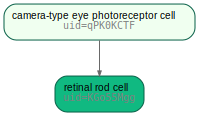

In [20]:
lb.CellType.search('CL:0000604', field="ontology_id",return_queryset=True).first().view_parents()

In [389]:
{lb.Tissue.search(val, field="name",return_queryset=True).first().ontology_id: val for val in ['wall of heart',
'digestive tract epithelium',
'gray matter',
'gyrus',
'lobe of lung',
'blood vessel',
'bone element',]}

{'UBERON:0037144': 'wall of heart',
 'UBERON:0003929': 'digestive tract epithelium',
 'UBERON:0002020': 'gray matter',
 'UBERON:0000200': 'gyrus',
 'UBERON:0000101': 'lobe of lung',
 'UBERON:0001981': 'blood vessel',
 'UBERON:0001474': 'bone element'}

In [ ]:
additional_tissues = {'UBERON:0037144': 'wall of heart',
 'UBERON:0003929': 'digestive tract epithelium',
 'UBERON:0002020': 'gray matter',
 'UBERON:0000200': 'gyrus',
 'UBERON:0000101': 'lobe of lung',
 'UBERON:0001981': 'blood vessel',
 'UBERON:0001474': 'bone element'}


additional_diseases = {'MONDO:0001106': 'kidney failure',
 'MONDO:0021166': 'inflammatory disease',
 'MONDO:0004992': 'cancer',
 'MONDO:0004994': 'cardiomyopathy',
 'MONDO:0700065': 'trisomy',
 'MONDO:0021042': 'glioma',
 'MONDO:0005265': 'inflammatory bowel disease',
 'MONDO:0005550': 'infectious disease',
 'MONDO:0005059': 'leukemia'}

In [131]:
genes.validate(adata.var.index, field="ensembl_gene_id").all()

‚úÖ 26714 terms (99.80%) are validated
‚ùó 65 terms (0.20%) are not validated: ENSG00000239467, ENSG00000236886, ENSG00000224739, ENSG00000237133, ENSG00000227902, ENSG00000259820, ENSG00000226377, ENSG00000237838, ENSG00000262668, ENSG00000272040, ENSG00000182230, ENSG00000228139, ENSG00000215271, ENSG00000226380, ENSG00000256618, ENSG00000256045, ENSG00000270188, ENSG00000269028, ENSG00000270394, ENSG00000271043, ...


False

## complete
- missing elements already (look at full cellxgene dataset)
- add supergroups that will make things easier if they are there (i.e.
leafs are likely too similar)
- add these higher annotations to cells that have the too similar ones
as well
- replace some too basic ones by "unknown'

In [3]:
import cellxgene_census
import tiledbsoma as soma

census = cellxgene_census.open_soma(census_version = "latest")
batch = ['self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'assay_ontology_term_id', 'dataset_id']
features = ['tissue_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id']
df = census["census_data"]["homo_sapiens"].obs.read(column_names=batch+features, value_filter="is_primary_data == True").concat().to_pandas()
df2 = census["census_data"]["mus_musculus"].obs.read(column_names=batch+features, value_filter="is_primary_data == True").concat().to_pandas()
df.shape

(39037801, 9)

In [137]:
Ethnicity.validate(df.rename(columns={'self_reported_ethnicity_ontology_term_id':{'multiethnic':'unknown'}, '':{}}).unique(), field="ontology_id")

‚úÖ 28 terms (93.30%) are validated
‚ùó 2 terms (6.70%) are not validated: unknown, multiethnic


array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True])

In [176]:
ExperimentalFactor.validate(df['assay_ontology_term_id'].unique(), field="ontology_id").all()

‚úÖ 19 terms (95.00%) are validated
‚ùó 1 term (5.00%) is not validated: EFO:0700016


False

In [175]:
Disease.validate(df['disease_ontology_term_id'].unique(), field="ontology_id").all()

‚úÖ 71 terms (98.60%) are validated
‚ùó 1 term (1.40%) is not validated: PATO:0000461


False

In [174]:
DevelopmentalStage.validate(df['development_stage_ontology_term_id'].unique(), field="ontology_id").all()

‚úÖ 171 terms (99.40%) are validated
‚ùó 1 term (0.60%) is not validated: unknown


False

In [172]:
Tissue.validate(df['tissue_ontology_term_id'].unique(), field="ontology_id").all()

‚úÖ 232 terms (100.00%) are validated


True

In [173]:
celltypes.validate(df['cell_type_ontology_term_id'].unique(), field="ontology_id").all()

‚úÖ 628 terms (100.00%) are validated


True

## dataset management

In [9]:
cx_dataset = ln.Collection.using("laminlabs/cellxgene-census").one()
cx_dataset


Dataset(uid='EAUF1AaT4kOVyHYnZsUJ', name='cellxgene-census', version='2023-07-25', hash='pEJ9uvIeTLvHkZW2TBT5', visibility=0, updated_at=2023-10-24 16:00:07 UTC, transform_id=1, run_id=9, created_by_id=2)

In [10]:
ln.setup.settings.storage.cache_dir = ln.UPath('/home/ml4ig1/.cache/lamindb')

In [11]:
ln.settings.storage

PosixUPath('/home/ml4ig1/Documents code/data2')

In [12]:
storage = ln.Storage(root=ln.settings.storage)

In [13]:
storage.save()

IntegrityError: UNIQUE constraint failed: lnschema_core_storage.root

In [19]:
cx_dataset.files

<django.db.models.fields.related_descriptors.create_forward_many_to_many_manager.<locals>.ManyRelatedManager at 0x7f4da11e61d0>

In [14]:
from django.db import IntegrityError

In [177]:
for file in cx_dataset.files.all()[:10]:
    file.storage = storage
    file.save()

‚ùó no run & transform get linked, consider passing a `run` or calling ln.track()
üí° you can auto-track this file as a run input by calling `ln.track()`


ValueError: Cannot assign "Storage(uid='HIuhQCHA', root=/home/ml4ig1/Documents code/data2, type='', updated_at=2023-11-19 14:49:24 UTC, created_by_id=1)": the current database router prevents this relation.

In [23]:
localpath = []
for file in cx_dataset.files.all()[:10]:
    #file.storage 
    localpath.append(file.stage())
    try:
        file.save()
    except IntegrityError:
        print(f"File {file.uid} already exists in storage")

NameError: name 'cx_dataset' is not defined

In [14]:
localpath.pop(1)

PosixUPath('/home/ml4ig1/.cache/lamindb/cellxgene-data-public/cell-census/2023-07-25/h5ads/1075c26e-5c47-43ba-902c-5b6cb864dd10.h5ad')

In [11]:
localpath.pop(2)

PosixUPath('/home/ml4ig1/.cache/lamindb/cellxgene-data-public/cell-census/2023-07-25/h5ads/cd3c693e-64e1-4009-a941-ba3f340c7434.h5ad')

In [201]:
path = "/home/ml4ig1/scprint/cell-census/2023-07-25/h5ads/d5c67a4e-a8d9-456d-a273-fa01adb1b308.h5ad"
adata = ad.read_h5ad(path, backed=True)

In [25]:
ad.read_h5ad(val.path, backed=True)

NameError: name 'val' is not defined

In [17]:
list_adata = {}
for i, val in enumerate(localpath):
    adata_ = ad.read_h5ad(val.path, backed=True) 
    dataset_id = cx_dataset.files.all()[i].uid
    adata_.obs['dataset_id'] = dataset_id
    adata_.obs['dataset_id'] = adata_.obs['dataset_id'].astype('category')
    list_adata[dataset_id] = adata_

‚ùó no run & transform get linked, consider passing a `run` or calling ln.track()
üí° you can auto-track this file as a run input by calling `ln.track()`
üí° you can auto-track this file as a run input by calling `ln.track()`
‚ùó no run & transform get linked, consider passing a `run` or calling ln.track()
üí° you can auto-track this file as a run input by calling `ln.track()`
‚ùó no run & transform get linked, consider passing a `run` or calling ln.track()
üí° you can auto-track this file as a run input by calling `ln.track()`
‚ùó no run & transform get linked, consider passing a `run` or calling ln.track()
üí° you can auto-track this file as a run input by calling `ln.track()`
‚ùó no run & transform get linked, consider passing a `run` or calling ln.track()
üí° you can auto-track this file as a run input by calling `ln.track()`
‚ùó no run & transform get linked, consider passing a `run` or calling ln.track()
üí° you can auto-track this file as a run input by calling `ln.track(

In [106]:
fullad = ad.experimental.AnnCollection(list_adata, join_vars='inner')

/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/anndata/experimental/multi_files/_anncollection.py:730: UserWarning: Observation names are not unique.
  warnings.warn("Observation names are not unique.", UserWarning)


In [138]:
list_adata[0].obs

n_genes  n_counts  percent_mito donor_id  \
index                                                                        
0024369980fd003553cbc9dfe29f7f95     2351      6060      4.125412   Donor2   
002f621cb1c922521e488d9cbf8b707d     5868     28695      3.896149   Donor2   
0037f1b36684cb59b84d3585ca55ff69      950      1507      0.597213   Donor3   
00390952646f52d11a9ab9bba7d6ac51      961      1962      7.543323   Donor2   
005b3351658380695a5dc46c384d72d7      858      1384      0.144509   Donor2   
...                                   ...       ...           ...      ...   
ffa4633bef82949d2c6ac17b3ddf46e9     1813      4129      3.996125   Donor2   
ffa5758b0600f47722fdc755444dfe0c     2692      8244     16.460457   Donor2   
ffd3fd6119de767f3c3b8c47b2c28bf0      516       896      3.794643   Donor3   
ffe21ae45a7fad28db64783d0697fc4f      546       996      8.734940   Donor2   
fffd3d11e75c6c544e6741967b3edb7a     1896      4175      4.550898   Donor2   

                                 assay_ontology_term_id  \
index                                                     
0024369980fd003553cbc9dfe29f7f95            EFO:0009899   
002f621cb1c922521e488d9cbf8b707d            EFO:0009899   
0037f1b36684cb59b84d3585ca55ff69            EFO:0009899   
00390952646f52d11a9ab9bba7d6ac51            EFO:0009899   
005b3351658380695a5dc46c384d72d7            EFO:0009899   
...                                                 ...   
ffa4633bef82949d2c6ac17b3ddf46e9            EFO:0009899   
ffa5758b0600f47722fdc755444dfe0c            EFO:0009899   
ffd3fd6119de767f3c3b8c47b2c28bf0            EFO:0009899   
ffe21ae45a7fad28db64783d0697fc4f            EFO:0009899   
fffd3d11e75c6c544e6741967b3edb7a            EFO:0009899   

                                 cell_type_ontology_term_id  \
index                                                         
0024369980fd003553cbc9dfe29f7f95                 CL:0000604   
002f621cb1c922521e488d9cbf8b707d                 CL:0000003   
0037f1b36684cb59b84d3585ca55ff69                 CL:0000604   
00390952646f52d11a9ab9bba7d6ac51                 CL:0000604   
005b3351658380695a5dc46c384d72d7                 CL:0000604   
...                                                     ...   
ffa4633bef82949d2c6ac17b3ddf46e9                 CL:0000604   
ffa5758b0600f47722fdc755444dfe0c                 CL:0000573   
ffd3fd6119de767f3c3b8c47b2c28bf0                 CL:0000604   
ffe21ae45a7fad28db64783d0697fc4f                 CL:0000003   
fffd3d11e75c6c544e6741967b3edb7a                 CL:0000604   

                                 development_stage_ontology_term_id  \
index                                                                 
0024369980fd003553cbc9dfe29f7f95                     HsapDv:0000136   
002f621cb1c922521e488d9cbf8b707d                     HsapDv:0000136   
0037f1b36684cb59b84d3585ca55ff69                     HsapDv:0000147   
00390952646f52d11a9ab9bba7d6ac51                     HsapDv:0000136   
005b3351658380695a5dc46c384d72d7                     HsapDv:0000136   
...                                                             ...   
ffa4633bef82949d2c6ac17b3ddf46e9                     HsapDv:0000136   
ffa5758b0600f47722fdc755444dfe0c                     HsapDv:0000136   
ffd3fd6119de767f3c3b8c47b2c28bf0                     HsapDv:0000147   
ffe21ae45a7fad28db64783d0697fc4f                     HsapDv:0000136   
fffd3d11e75c6c544e6741967b3edb7a                     HsapDv:0000136   

                                 disease_ontology_term_id  \
index                                                       
0024369980fd003553cbc9dfe29f7f95             PATO:0000461   
002f621cb1c922521e488d9cbf8b707d             PATO:0000461   
0037f1b36684cb59b84d3585ca55ff69             PATO:0000461   
00390952646f52d11a9ab9bba7d6ac51             PATO:0000461   
005b3351658380695a5dc46c384d72d7             PATO:0000461   
...                                                   ...   
ffa4633bef82949d2c6

In [103]:
fullad.var_names

Index(['ENSG00000000003', 'ENSG00000000419', 'ENSG00000000457',
       'ENSG00000000460', 'ENSG00000000938', 'ENSG00000000971',
       'ENSG00000001036', 'ENSG00000001084', 'ENSG00000001167',
       'ENSG00000001460',
       ...
       'ENSG00000273416', 'ENSG00000273437', 'ENSG00000273448',
       'ENSG00000273449', 'ENSG00000273456', 'ENSG00000273464',
       'ENSG00000273473', 'ENSG00000273474', 'ENSG00000273486',
       'ENSG00000273489'],
      dtype='object', length=15335)

In [20]:
k = "CAQPyYbcP4UjgiIfniQK"

In [21]:
adata = list_adata[k]

In [30]:
unseen = {}

In [58]:
adata = adata.to_memory()

In [131]:
from scprint.dataset.preprocess import Preprocessor
%reload_ext autoreload
%autoreload 2

In [105]:
k = "test"

In [144]:
def preproc(adata):
    adata.obs = adata.obs.replace({'self_reported_ethnicity_ontology_term_id':{
        'multiethnic':'unknown',
        'American':'unknown',
        'Jewish Israeli': 'unknown',
        'na': 'unknown'}}) #multi ethnic will have to get renamed
    return adata

In [202]:
preprocess = Preprocessor(lb, additional_preprocess=preproc)

In [187]:
add = ["CL:0000648", "CL:0019018"]
records = lb.CellType.from_values(add, field=lb.CellType.ontology_id)
ln.save(records)

‚ùó now recursing through parents: this only happens once, but is much slower than bulk saving


In [190]:
add = ["EFO:0030062"]
records = lb.ExperimentalFactor.from_values(add, field=lb.ExperimentalFactor.ontology_id)
ln.save(records)

‚ùó now recursing through parents: this only happens once, but is much slower than bulk saving


In [203]:
adata = preprocess(adata)

/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:248: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_counts'] = number


Removed 90 genes.

Seeing 4154 outliers (21.09% of total dataset):


In [230]:
len(list(unseen.tolist()))

33079

In [231]:
adata.uns['unseen_genes'] = list(unseen.tolist())

In [232]:
adata.write_h5ad("test.h5ad")

In [3]:
adata = ad.read_h5ad("test.h5ad")

In [7]:
import scanpy as sc

In [8]:
sc.tl.diffmap(adata)

In [77]:
# define the "up to" 10 neighbors for each cells and add to obs
    # compute neighbors
    # need to be connectivities and same labels [cell type, assay, dataset, disease]
# define the "next time point" up to 5(M) cells and add to obs  

In [10]:
adata.obs['heat'] = adata.obsm["X_diffmap"][:, 0]

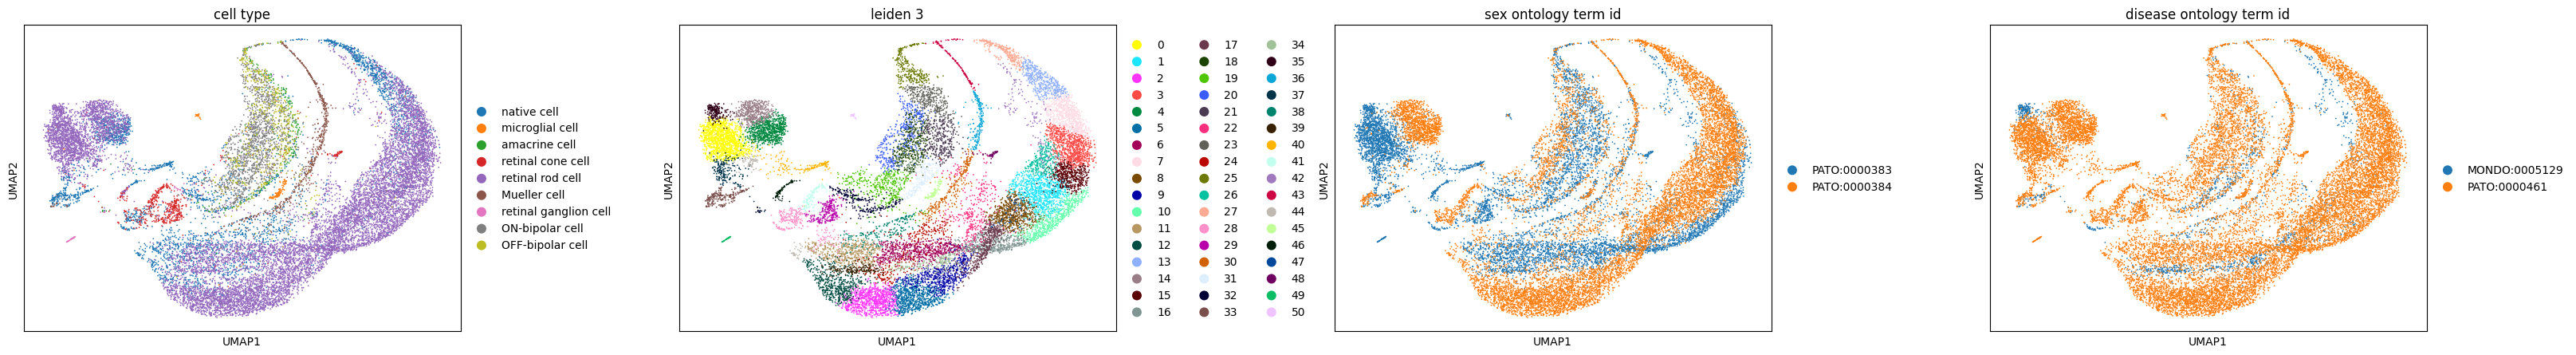

In [13]:
sc.pl.scatter(adata, basis="umap", color=['cell_type', 'leiden_3', 'sex_ontology_term_id', "disease_ontology_term_id"])

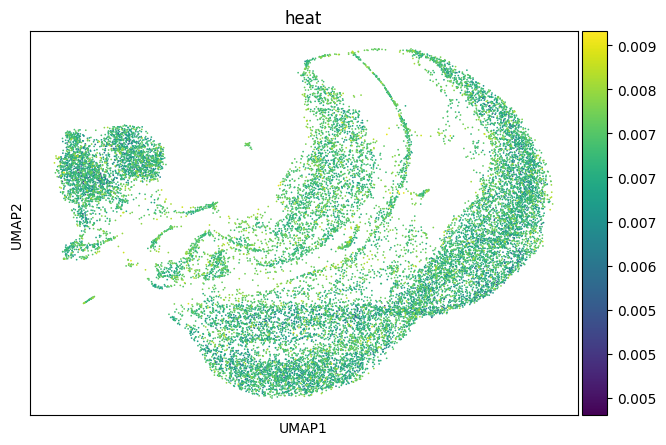

In [14]:
sc.pl.scatter(adata, basis="umap", color=["heat"])

## for all cells create the 5 next time point cells

per cluster + disease + cell type + tissue +

/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/anndata/_core/anndata.py:1292: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
... storing 'dpt_group' as categorical


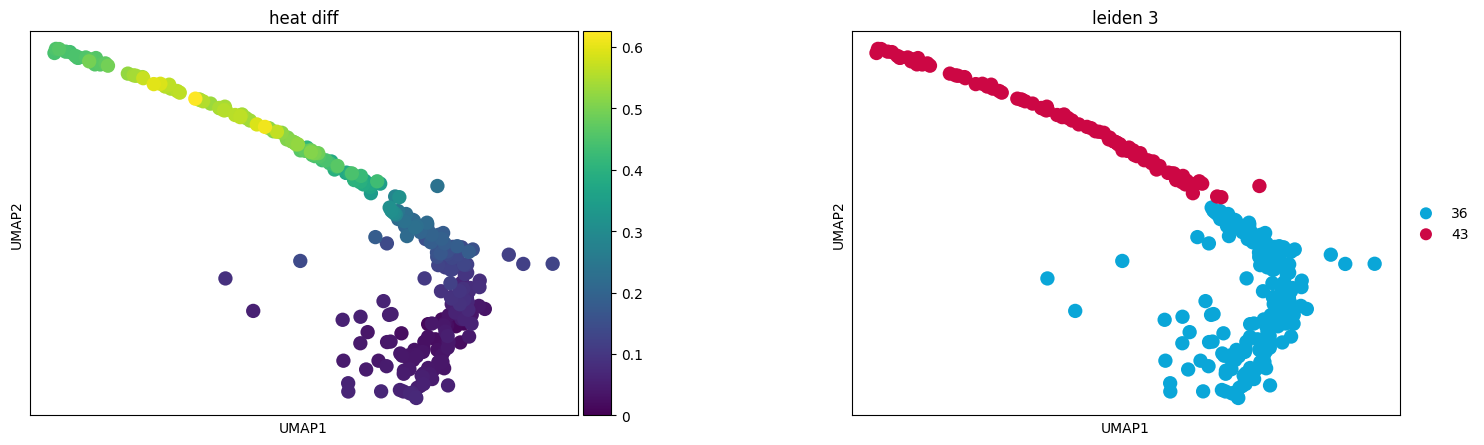

In [23]:
sc.pl.scatter(adata[eq], basis="umap", color=["heat_diff", "leiden_3"])

In [41]:
adata.obs['heat_diff']

index
0024369980fd003553cbc9dfe29f7f95    0.015115
002f621cb1c922521e488d9cbf8b707d    0.016923
0037f1b36684cb59b84d3585ca55ff69    0.034581
00390952646f52d11a9ab9bba7d6ac51    0.043176
005b3351658380695a5dc46c384d72d7    0.018042
                                      ...   
ffa4633bef82949d2c6ac17b3ddf46e9    0.071882
ffa5758b0600f47722fdc755444dfe0c    0.033949
ffd3fd6119de767f3c3b8c47b2c28bf0    0.020480
ffe21ae45a7fad28db64783d0697fc4f    0.033010
fffd3d11e75c6c544e6741967b3edb7a    0.044117
Name: heat_diff, Length: 19694, dtype: float64

In [46]:
adata.obs['plot_heat_diff'] = [0.2 if i > 0.2 else i for i in adata.obs['heat_diff']]

/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  return bound(*args, **kwds)
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/plotting/_utils.py:715: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = color[sort]


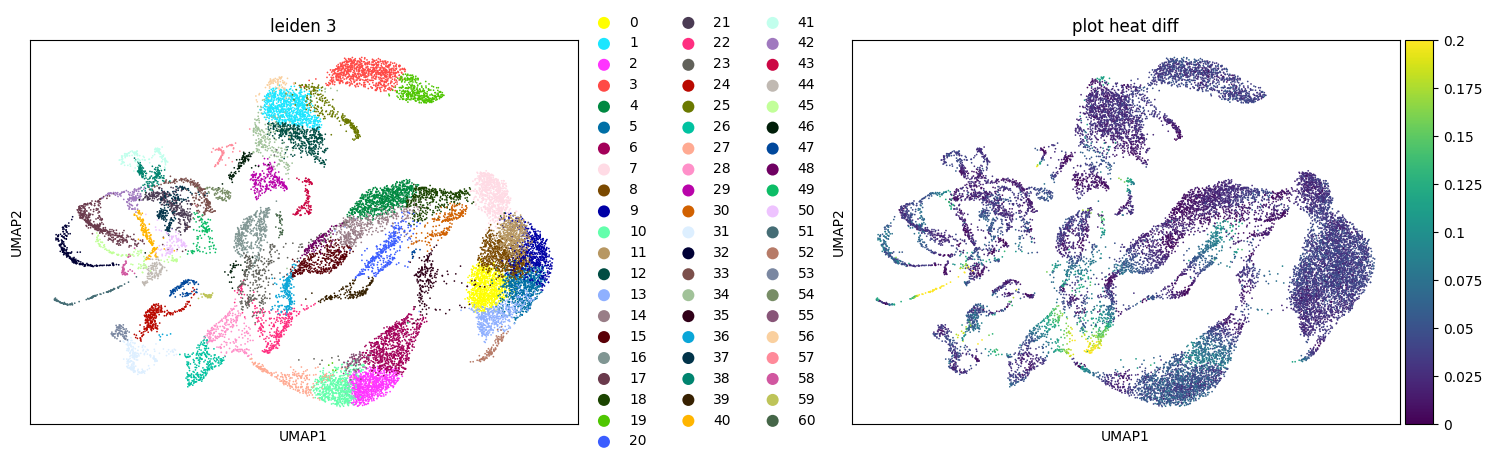

In [47]:
sc.pl.scatter(adata, basis="umap", color=["leiden_3", "plot_heat_diff"])

In [115]:
# create a meta group
adata.obs['dpt_group'] = adata.obs['leiden_1'].astype(str) + "_" + adata.obs['disease_ontology_term_id'].astype(str) + "_" + adata.obs['cell_type_ontology_term_id'].astype(str) + "_" + adata.obs['tissue_ontology_term_id'].astype(str) #+ "_" + adata.obs['dataset_id'].astype(str)

# if group is too small
okgroup = [i for i, j in adata.obs['dpt_group'].value_counts().items() if j>=10]
not_okgroup = [i for i, j in adata.obs['dpt_group'].value_counts().items() if j<3]
# set the group to empty
adata.obs.loc[adata.obs['dpt_group'].isin(not_okgroup), 'dpt_group'] = ''
adata.obs['heat_diff'] = np.nan
# for each group
for val in set(okgroup):
    if val == '':
        continue
    # get the best root cell
    eq = adata.obs.dpt_group==val
    loc = np.where(eq)[0]

    root_ixs = loc[adata.obsm["X_diffmap"][eq, 0].argmin()]
    adata.uns["iroot"] = root_ixs
    # compute the diffusion pseudo time from it
    sc.tl.dpt(adata)
    adata.obs.loc[eq, 'heat_diff'] = adata.obs.loc[eq, 'dpt_pseudotime']
    adata.obs.drop(columns=['dpt_pseudotime'], inplace=True)

#sort so that the next time points are aligned for all groups
adata = adata[adata.obs.sort_values(['dpt_group','heat_diff']).index]
#to query N next time points we just get the N elements below and check they are in the group
# to query the N nearest neighbors we just get the N elements above and N below and check they are in the group

TypeError: object of type 'int' has no len()

In [114]:
# TODO: store it as an awkward array obsm in the anndata or as a sparse array like connectivities

In [ ]:
from scipy.sparse import find

/tmp/ipykernel_195385/1863125994.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.31533626 0.56458086 1.         0.89212644 0.0899928  0.10647792
 1.         0.22093962 0.2369727  0.33846393 0.03702245 0.12825827
 0.12653698 0.39368445 0.43781158]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  adata.obs.iloc[find(adata.obsp['connectivities'][LOC])[1].tolist(),-1] = find(adata.obsp['connectivities'][LOC])[2]
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scanpy/plotting/_utils.py:715: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = color[sort]


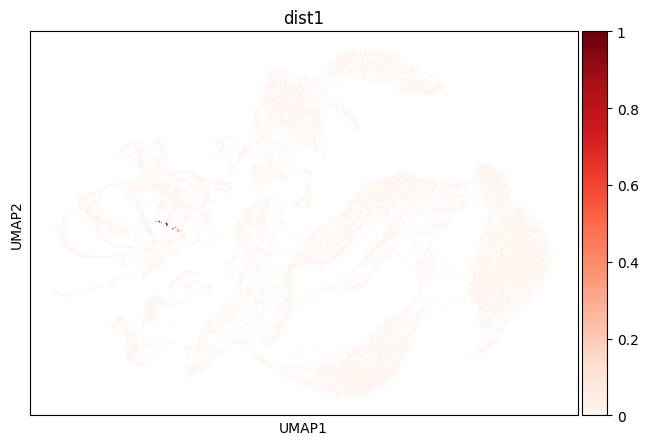

In [107]:
LOC = 1050
adata.obs['dist1'] = 0
adata.obs.iloc[find(adata.obsp['connectivities'][LOC])[1].tolist(),-1] = find(adata.obsp['connectivities'][LOC])[2]
sc.pl.scatter(adata, basis="umap", color=["dist1"], color_map="Reds")


## find the up to 10 nearest neighboors

In [48]:
# getting the top 10 neighbors
ids = np.zeros((adata.shape[0], 10), dtype=int)-1
for i in range(adata.shape[0]):
    _, loc, val = find(adata.obsp['connectivities'][i])
    loc = loc[val.argsort()[:10]]
    ids[i, :len(loc)] = loc

AnnData object with n_obs √ó n_vars = 19694 √ó 70116
    obs: 'n_genes', 'n_counts', 'percent_mito', 'donor_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'author_cell_type', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'dataset_id', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'leiden_3', 'leiden_2', 'leiden_1', 'dpt_group', 'heat_diff', 'plot_heat_diff'
    var: 'chromosome', 'featureend', 'featu

## putting it all together

In [71]:
MINDATASET_SIZE = 100
MIN_VALID_GENES_ID = 10_000
MIN_NNZ_GENES = 300
MIN_NNZ_GENES_SLIDESEQ = 100
MAXDROPAMOUNT = 2 # 1/[2] = 50% of the dataset
MAX_NEIGHBORS = 10
DO_NORM=True
MADOUTLIER = 5
PCT_MT_OUTLIER = 8
FULL_LENGTH_ASSAYS = ['EFO: 0700016', 'EFO:0008930', 'EFO:0008931',]

In [130]:
lb.Gene.filter(symbol="TSPAN6").one()

Gene(uid='mRzSiS7BgReH', symbol='TSPAN6', ensembl_gene_id='ENSG00000000003', ncbi_gene_ids='7105', biotype='protein_coding', description='tetraspanin 6 [Source:HGNC Symbol;Acc:HGNC:11858]', synonyms='T245|TSPAN-6|TM4SF6', updated_at=2023-11-22 13:16:56 UTC, organism_id=2, bionty_source_id=9, created_by_id=1)

In [119]:
adata.obsm['X_spatial']

ArrayView([[2911.90625   , 4155.71875   ],
           [1733.28409091, 1766.56818182],
           [2351.80246914, 4196.20987654],
           ...,
           [4379.85882353, 3694.90588235],
           [2911.05442177, 2520.72789116],
           [3645.14285714,  817.55357143]])

In [37]:
genesdf = lb.Gene.df()
genesdf = genesdf.drop_duplicates(subset='ensembl_gene_id')
genesdf = genesdf.set_index('ensembl_gene_id')
# mitochondrial genes
genesdf["mt"] = genesdf.symbol.astype(str).str.startswith("MT-")
# ribosomal genes
genesdf["ribo"] = genesdf.symbol.astype(str).str.startswith(("RPS", "RPL"))
# hemoglobin genes.
genesdf["hb"] = genesdf.symbol.astype(str).str.contains(("^HB[^(P)]"))

In [105]:
cx_datasets['size'].sum()/1_000_000_000

NameError: name 'cx_datasets' is not defined